<a href="https://colab.research.google.com/github/TeguhFerdian/Final_project/blob/main/Pandas_Lovers_Holiday_Package_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREPARATION**

**DATASET : HOLIDAY PACKAGE PREDICTION**

**1. PROBLEM STATEMENT**

Perusahaan traveling 'Trips & Travel.Com' membuat penawaran paket liburan terbaru. Agar lebih efektif, perusahaan ingin menyelesaikan permasalahan yang ada.
- Pada tahun lalu, hanya 18% pelanggan yang membeli paket liburan yang ditawarkan.
- Revenue perusahaan tidak mengalami peningkatan yang signifikan.

**2. GOAL**

Untuk menaikkan convertion rate dan revenue perusahaan.

**3. OBJECTIVE**

Membuat model untuk memprediksi pelanggan yang akan membeli paket liburan terbaru.

**4. BUSINESS METRICS**
- Total revenue 
- convertion rate

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import re 
import matplotlib.patches

In [2]:
import matplotlib
print(matplotlib.__version__)
print(sns.__version__)
print(pd.__version__)

3.7.1
0.12.2
1.5.3


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/Travel.csv")
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **EDA, INSIGHT & VISUALIZATION**

QUICK LOOK

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**CHECK DATA DUPLIKAT dan VALUE COUNT (CATEGORICAL)**

In [8]:
print('Banyak Data : ',df.shape)
print('Jumlah Id Customer Duplikat : ',df['CustomerID'].duplicated().sum())
print('Jumlah Data Duplikat',df.duplicated().sum())

Banyak Data :  (4888, 20)
Jumlah Id Customer Duplikat :  0
Jumlah Data Duplikat 0


In [14]:
#for i in categorical:
 #   print(df[i].value_counts(), end="\n\n")

In [11]:
print("Value count gender :\n\n",df['Gender'].value_counts())
#Ubah value Fe Male menjadi Female
new_gender = [ 'Female' if i=='Fe Male' or i=='Female' else 'Male' for i in df['Gender'] ]
df['Gender']=new_gender

print("\n\nValue count gender : \n", df['Gender'].value_counts())

Value count gender :

 Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64


Value count gender : 
 Male      2916
Female    1972
Name: Gender, dtype: int64


**QUICK LOOK INSIGHT**

- Semua kolom / fitur telah memiliki tipe data yang sesuai dengan isi data tersebut
- Terdapat missing value pada kolom (Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome). Sehingga diperlukan adanya handling missing value pada Data Pre-Processing
- Terdapat Typo / Kesalahan input data pada kolom Gender (Male, Female, Fe Male). Agar tidak ambigu dalam eksplorasi data, maka kita fix value (Fe Male menjadi Female)

## **1. Descriptive Statistics**

In [12]:
categorical = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num         = ['Age','DurationOfPitch','MonthlyIncome']
diskrit     = ['ProdTaken','CityTier','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar',
              'NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar', 'NumberOfChildrenVisiting']

In [ ]:
df[diskrit].describe()

,ProdTaken,CityTier,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting
count,4888.000000,4888.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000
mean,0.188216,1.654255,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267
std,0.390925,0.916583,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861
min,0.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,0.000000,1.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000
75%,0.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000
max,1.000000,3.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000


In [ ]:
df[num].describe()

,Age,DurationOfPitch,MonthlyIncome
count,4662.000000,4637.000000,4655.000000
mean,37.622265,15.490835,23619.853491
std,9.316387,8.519643,5380.698361
min,18.000000,5.000000,1000.000000
25%,31.000000,9.000000,20346.000000
50%,36.000000,13.000000,22347.000000
75%,44.000000,20.000000,25571.000000
max,61.000000,127.000000,98678.000000


In [ ]:
df[categorical].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,2,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


**INSIGHT**

- Pada kolom NumberOfTrips, terdapat nilai (max = 22) dan (min = 1 ), Sedangkan memiliki mean = 3.23 yang lebih besar dari median = 3.000. mengindikasikan data tersebar pada nilai nilai yang memiliki value yang kecil. Atau bisa disebut terdistribusi (positif skewed)
- Pada kolom MonthlyIncome memiliki mean yang lebih besar dibandingkan nilai mediannya, mengindikasikan sebaran data tersebut yaitu positive skewed.
- Pada kolom monthly income juga memiliki mean yang lebih besar dibandingkan mediannya artinya distribusinya positive skewed.
- Pada kolom monthly income pun terlihat memiliki standard deviation yang sangat tinggi, yang mengartikan terdapat data data yang tersebar sangat jauh dari nilai rata rata, yang kemungkinan menandakan adanya outlier.

## **2.UNIVARIATE ANALYSIS**

<ipython-input-86-5144e580968a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], ax = axes[i], color=colors[i])
<ipython-input-86-5144e580968a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num[i]], ax = axes[i], color=colors[i])
<ipython-input-86-5144e580968a>:6: UserWarning: 

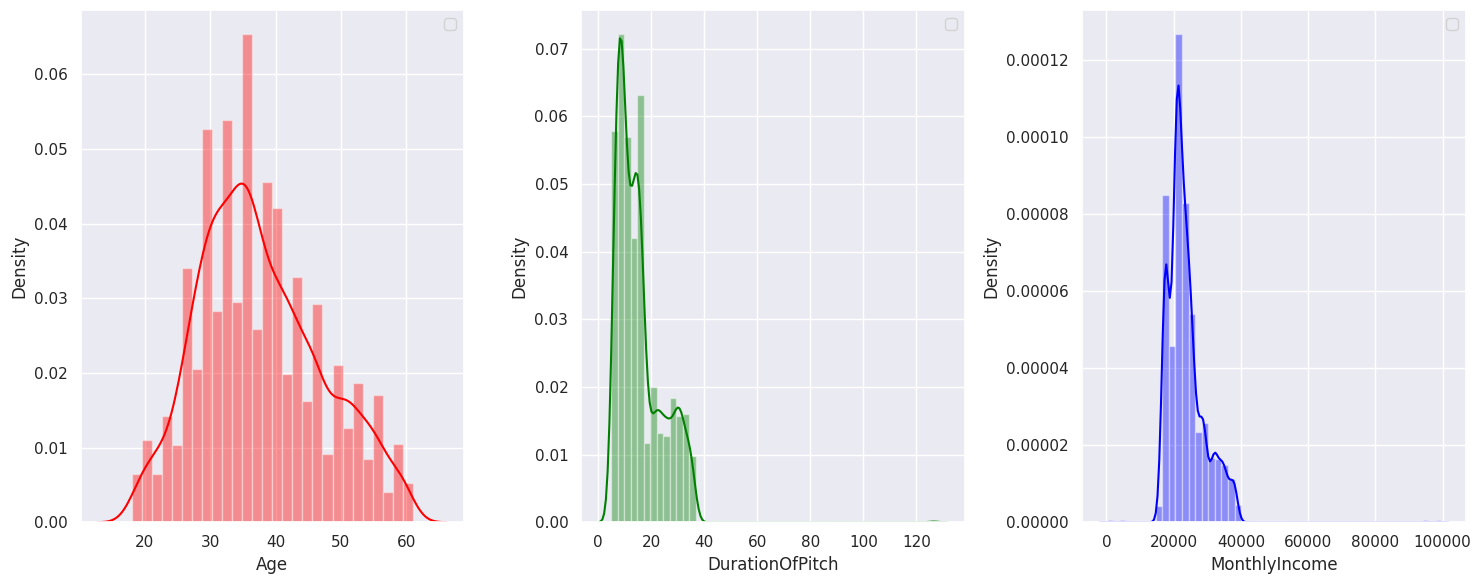

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
sns.set_theme(style="darkgrid", palette="pastel")
colors = ['red', 'green', 'blue']

for i in range(len(num)):
    sns.distplot(df[num[i]], ax = axes[i], color=colors[i]) 
    axes[i].legend()

plt.tight_layout()
plt.show()

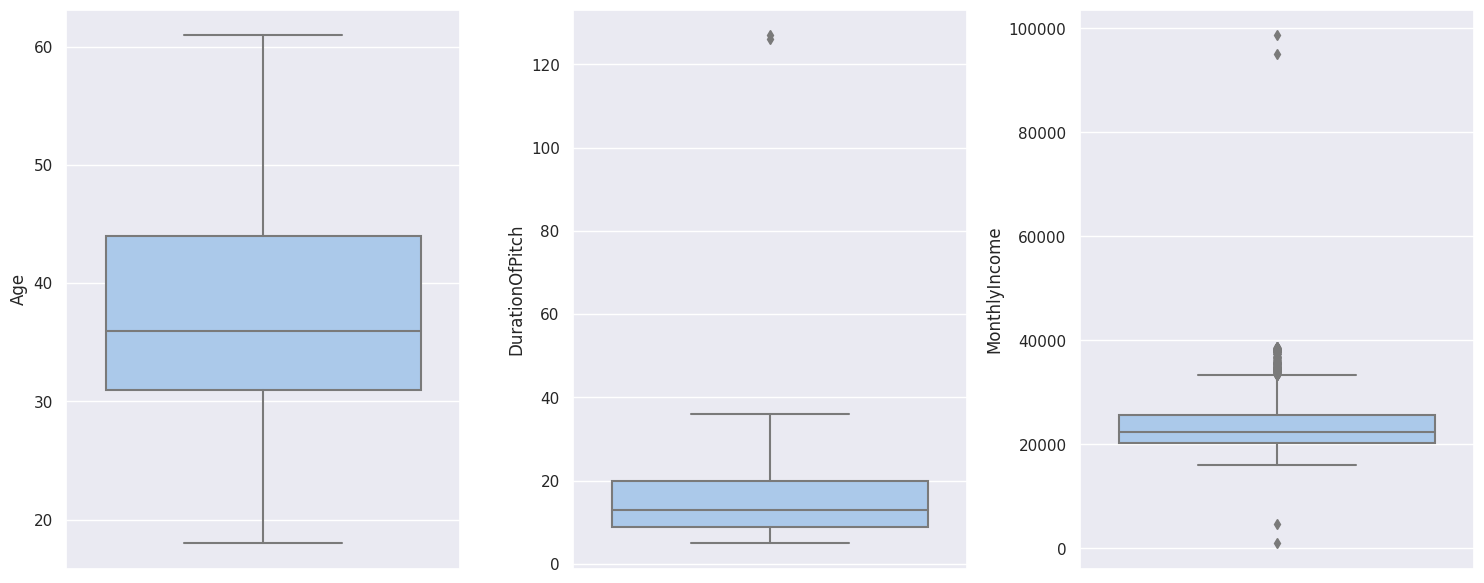

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,6))
for i in range(len(num)):
    sns.boxplot(y=num[i], ax = axes[i], data=df)
plt.tight_layout()
plt.show()

**INSIGHT DISTPLOT & BOXPLOT**

- Pada kolom Age, terlihat data terdistribusi normal
- Pada kolom DurationOfPitch terlihat distribusinya positif skewed dimana kebanyakan frekuensi data tersebar pada nilai <20. terlihat adanya outlier pada nilai > 120
- Pada kolom MonthlyIncome data tersebar pada nilai 20k - 30k. dimana terdapat data outlier pada nilai >80k dan < 10k

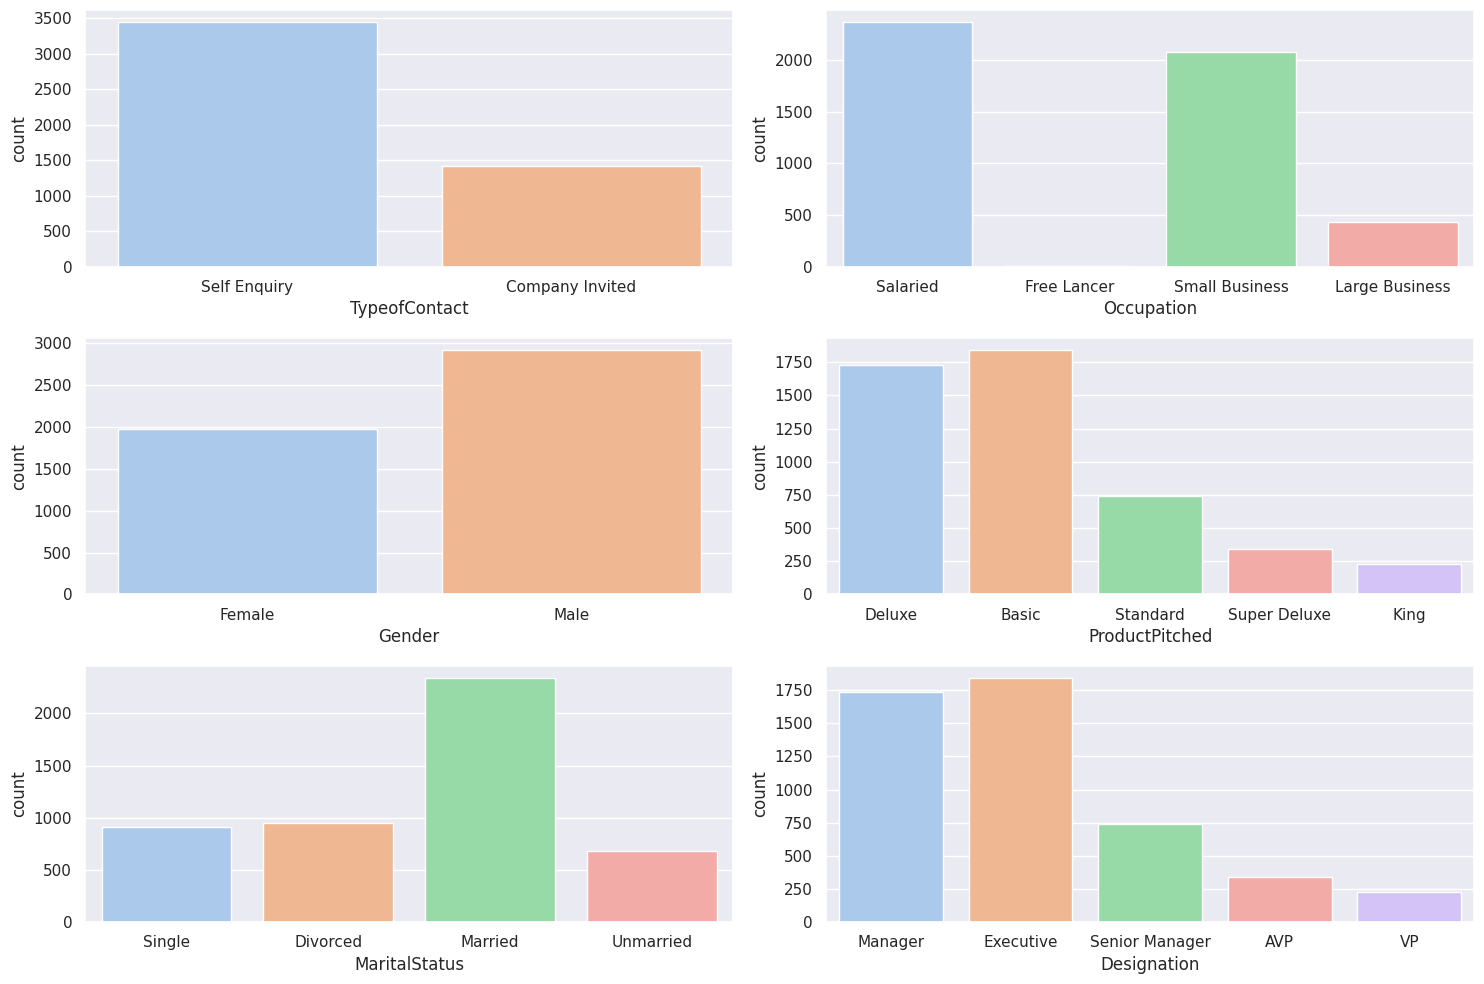

In [ ]:
plt.figure(figsize=(15,10))
for i in range (len(categorical)):
    plt.subplot(3,2, i+1)
    sns.countplot(data=df, x=categorical[i])
    sns.set_theme(style="darkgrid", palette="pastel")
plt.tight_layout()

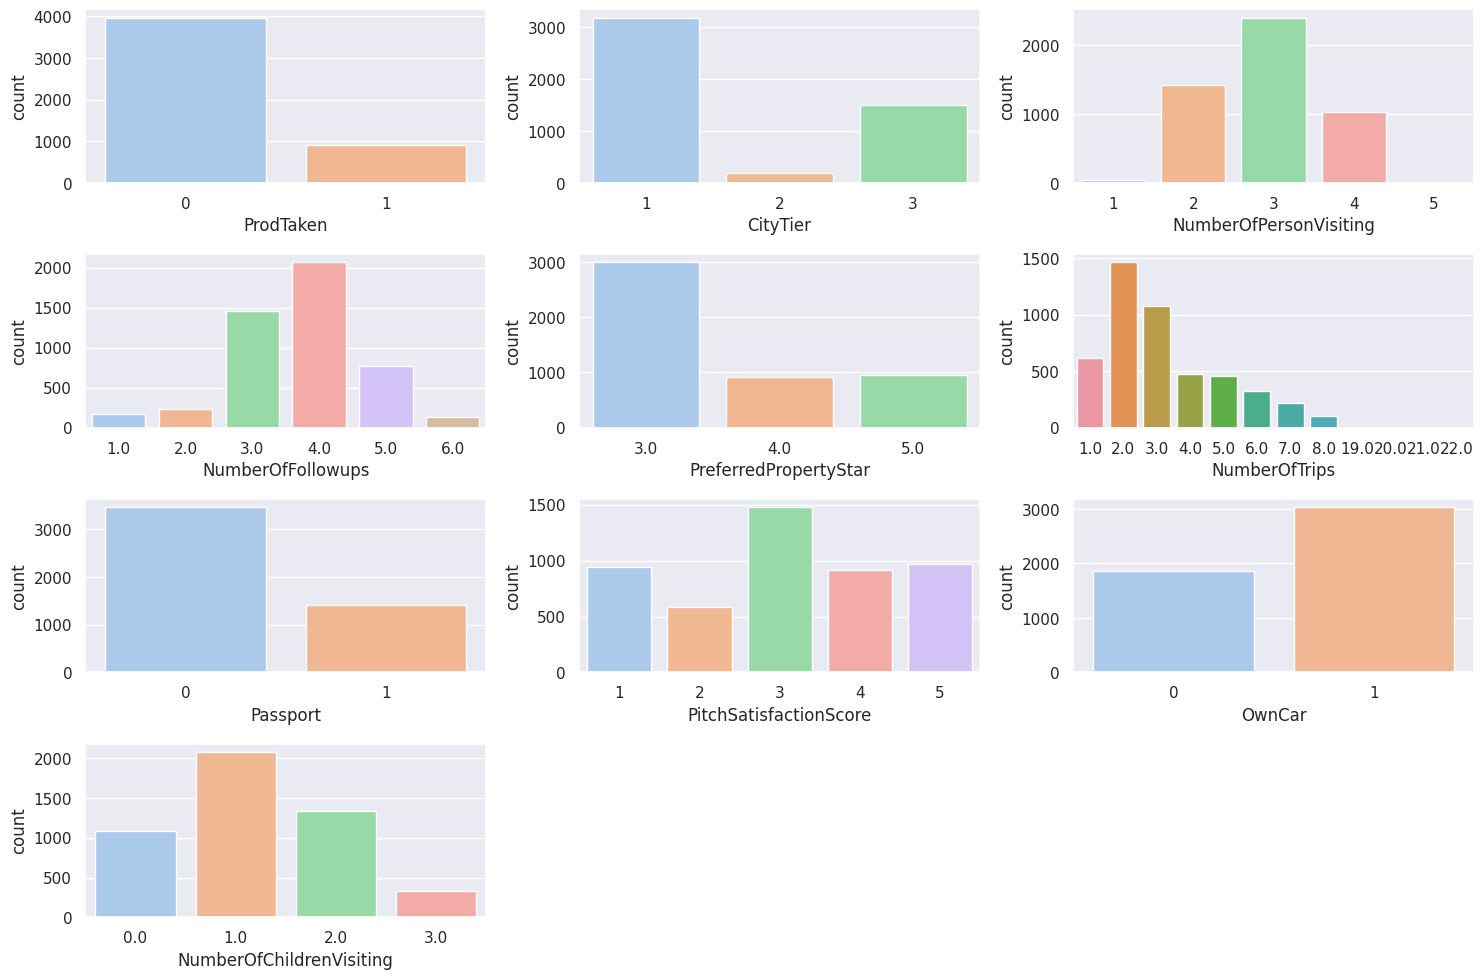

In [ ]:
plt.figure(figsize=(15,10))
for i in range(len(diskrit)):
    plt.subplot(4,3, i+1)
    sns.countplot(data=df, x=diskrit[i] )
    plt.tight_layout()

**INSIGHT COUNTPLOT**

- Pada kolom target (ProdTaken). Tedapat class imbalance atau ketimpangan data, dimana customer yang mengambil paket liburan (ProdTaken = 1) memiliki frequensi dibawah <1000. sedangkan customer yang tidak mengambil paket wisata (prodtaken =0 ) berjumlah sangat dominan, sekitar 4000 customer. Sehingga ketimpangan data pada target dapat diproses dengan undersampling / oversampling pada saat data preprocessing nanti
- Mayoritas customer merupakan bergender Male, Sudah Married, memiliki jabatan sebagai Manager & Executive, dan memiliki okupasi Salaried dan Small Business

## **3. MULTIVARIATE ANALYSIS**

Text(0.5, 1.0, 'No Product Taken')

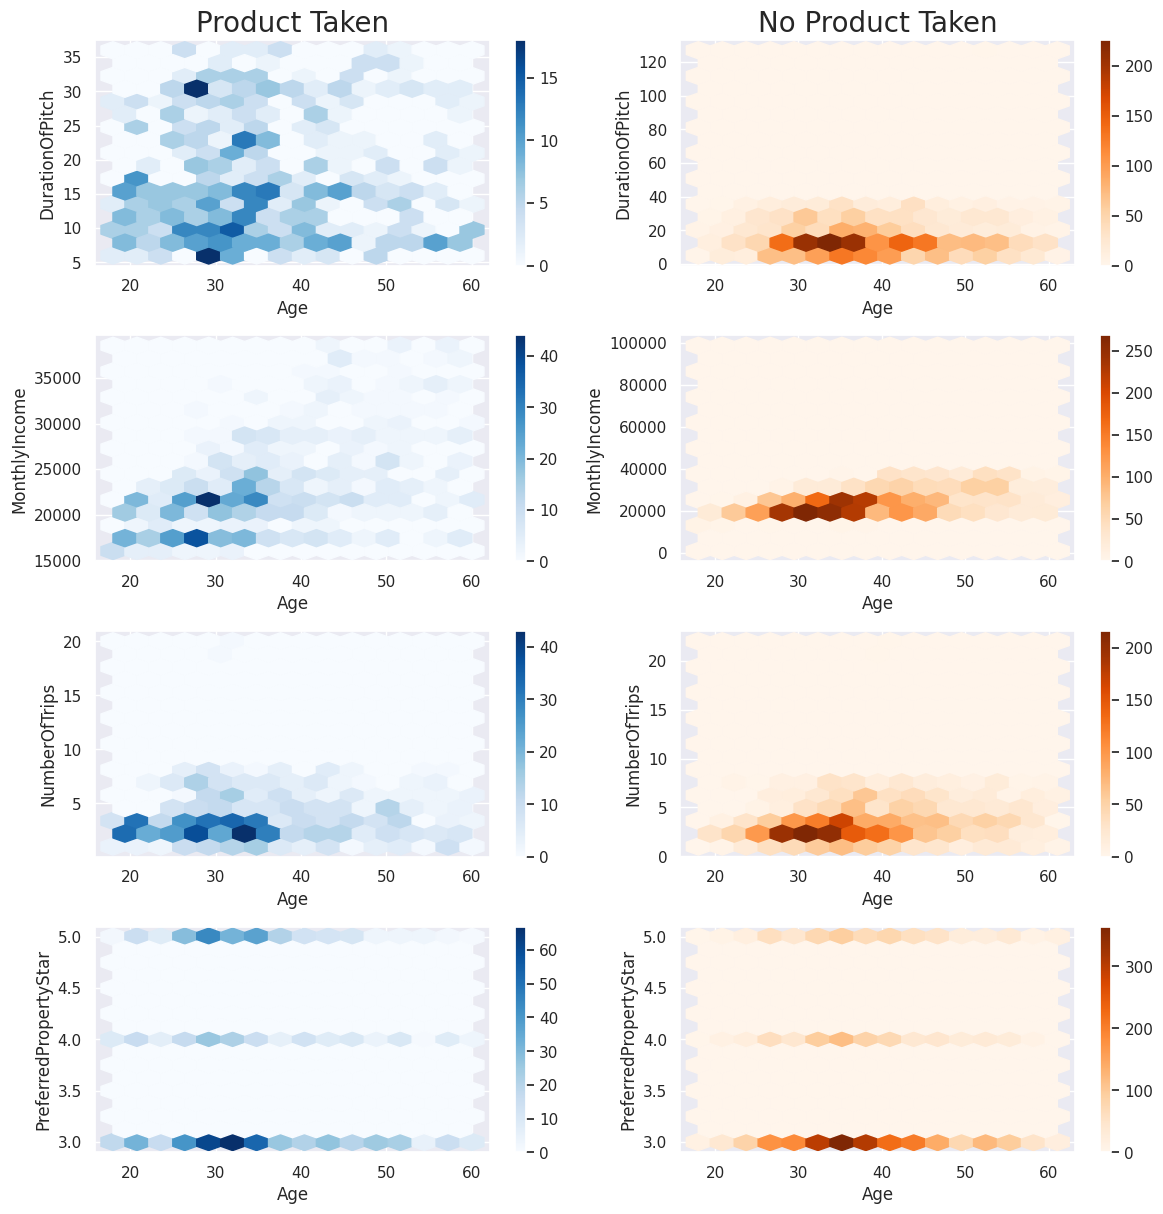

In [ ]:
df_prodtaken = df[(df['ProdTaken']==1)]
df_no_prodtaken = df[(df['ProdTaken']==0)]

subset = ['DurationOfPitch','MonthlyIncome','NumberOfTrips','PreferredPropertyStar']

fig, axes = plt.subplots(4,2, figsize = (12,12))
for i in range(4):
    df_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Blues',ax=axes[i,0],label='abb')
    df_no_prodtaken.plot(kind='hexbin', x='Age', y=subset[i], gridsize=15, colormap='Oranges', ax=axes[i,1],label='aa')
plt.tight_layout()
axes[0,0].set_title('Product Taken',fontsize=20)
axes[0,1].set_title('No Product Taken',fontsize = 20)

**INSIGHT**

- Pada usia 20 - 40 Tahun, customer yang membeli paket wisata memiliki rata rata DurationOfPitch diangka 5 - 30 menit. Sedangkan customer yang tidak membeli paket wisata rata rata memiliki DurationOfPitch diangka 10 menit
- Kebanyakan yang membeli paket liburan berusia 20 - 35 Tahun, dengan pendapatan bulanan berada pada rentan 17000 - 23000. Sedangkan customer yang tidak mengambil paket, cenderung berada pada usia 25 - 50 Tahun dengan pendapatan rata rata diangka 20000
- Sebagian besar customer yang mengambil paket wisata, mengambil properti hotel bintang 3 sebagai opsi pertama, dan diikuti oleh hotel bintang 5 sebagai opsi keduanya. Sedangkan customer yang tidak mengambil paket liburan, dominan memilih hotel bintang 3

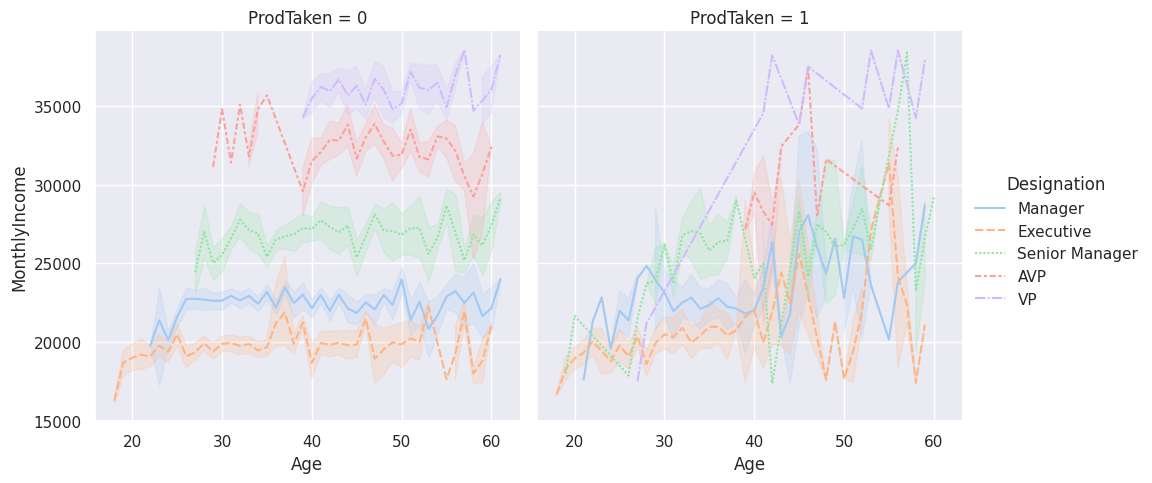

In [ ]:
sns.set_theme(style="darkgrid", palette="pastel")
sns.relplot(data=df, x='Age',y='MonthlyIncome', kind='line',  col='ProdTaken',hue='Designation',style="Designation")

**INSIGHT**

- Berdasarkan jabatan, Monthly income terbesar diperoleh oleh VP / Vice President, dan yang terkecil adalah Executive

<ipython-input-93-a80db9e78b66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')


<Axes: >

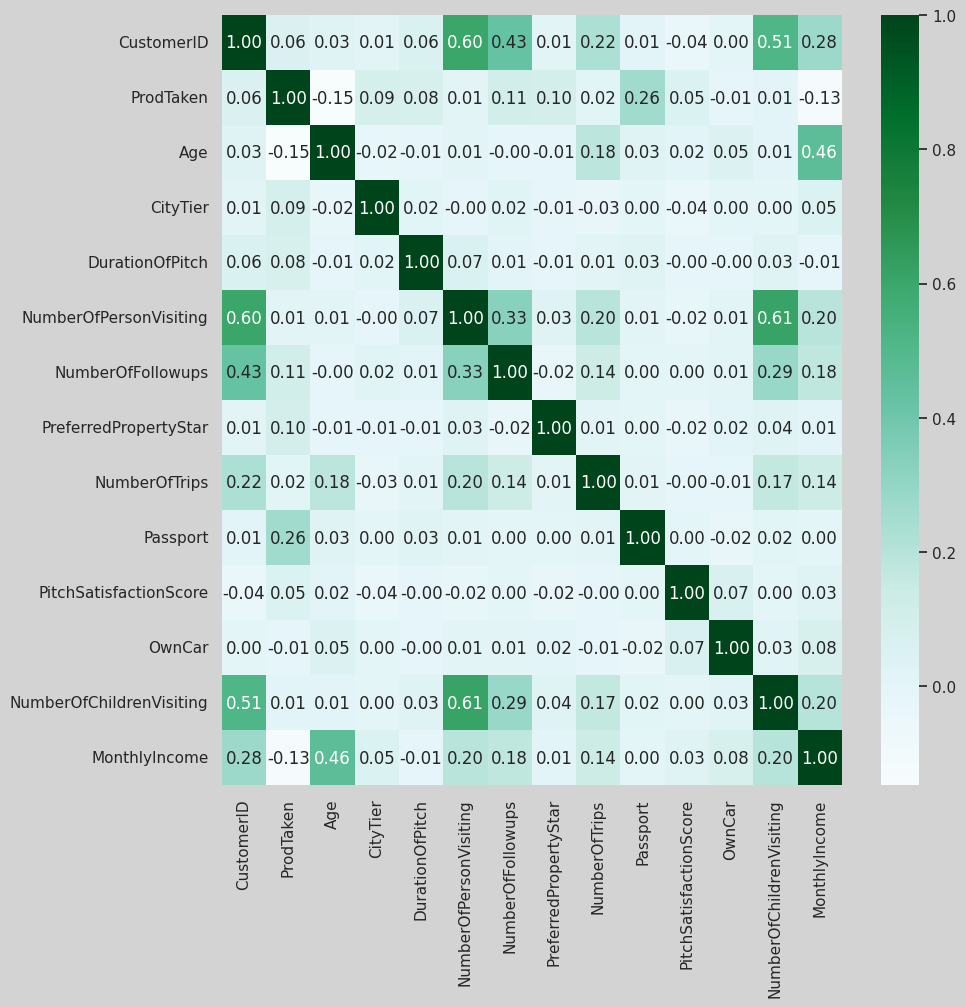

In [ ]:
plt.figure(figsize=(10,10), facecolor='lightgray')
sns.heatmap(df.corr(), cmap='BuGn',annot=True, fmt='.2f')

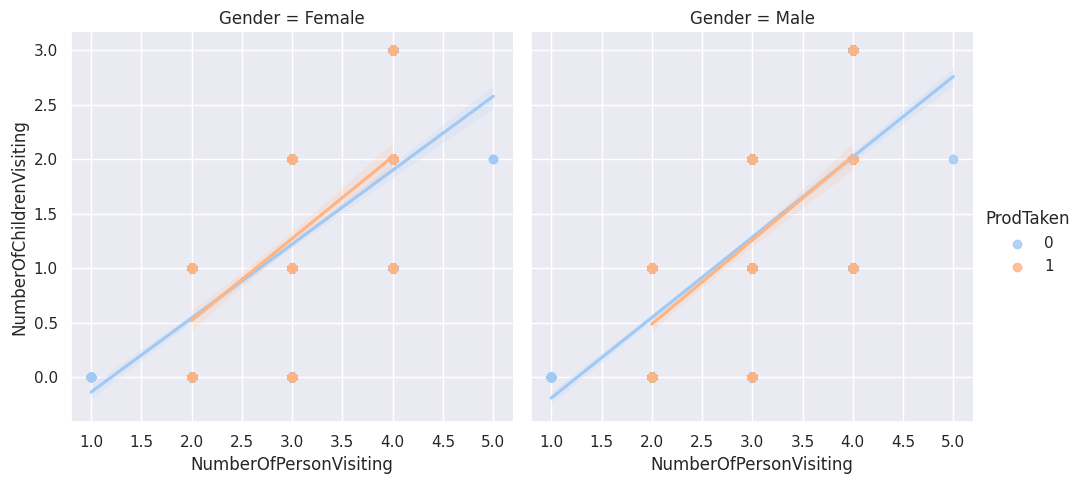

In [ ]:
sns.lmplot(data=df,x='NumberOfPersonVisiting', y='NumberOfChildrenVisiting', hue='ProdTaken', col='Gender')

**INSIGHT**

- Terdapat 2 fitur yang memiliki korelasi yang cukup kuat, yaitu NumberOfPersonVisiting dan NumberOfChildrenVisiting. dimana membentuk positif korelasi. Sehingga pada proses feature selection, kita dapat mengeliminasi fitur yang redundan(mempunyai informasi serupa) agar tidak terjadi overfitting pada model machine learning nantinya

# **DATA PRE-PROCESSING**

In [ ]:
#Code


# **MACHINE LEARNING MODELLING & EVALUATION**

In [ ]:
# CODE